# Ritz approximation for a discontinuous multiplication operator

In this notebook we show the Ritz approximation of the multiplication operator
$Mf = m(x)f(x)$ on $L^2(0, 1)$, where 
$$
m(x) \mapsto \begin{cases}
x & x < 1/2 \\
x + 1/2 & x > 1/2
\end{cases}
$$

The actual spectrum is $[0, 0.5]\cup[1, 1.5]$, and we will see spectral pollution
in the gap $[0.5, 1]$.

In [1]:
from specpol.ritz import ritz_bounded_L2, mult_sors
from specpol.algebra import create_m_op
from specpol.plot import plot_ritz

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# the symbol of our multiplication operator, m(x)
def step_slope(x):
    return x if x < 1/2 else x + 1/2


# `create_m_op` creates a multiplication operator with supplied symbol
step_operator = create_m_op(step_slope)

In [17]:
def plot(ritz_results, sors):
    # here we modify the plot of the approximation to add bands
    # where we expect the spectrum to be

    fig, ax1, ax2 = plot_ritz(ritz_results)
    ax1.axhspan(0, 1/2, facecolor="green", alpha=0.2)
    ax1.axhspan(1, 1.5, facecolor="green", alpha=0.2)
    ax2.axvspan(0, 1/2, facecolor="green", alpha=0.2)
    ax2.axvspan(1, 1.5, facecolor="green", alpha=0.2)
    ax2.scatter(sors[0].real, sors[0].imag, alpha=0.3, color='blue')
    fig.suptitle("Ritz approximation and second-order relative spectrum")

    plt.show()

In [12]:
spec_step_slope = dict()

for i in tqdm(range(50, 175, 25)):
    spec_step_slope[i] = np.linalg.eigvals(ritz_bounded_L2(step_operator, 1, i, 321))

sors = mult_sors(step_slope, 1, 150, 321)

100%|██████████| 5/5 [01:17<00:00, 15.55s/it]


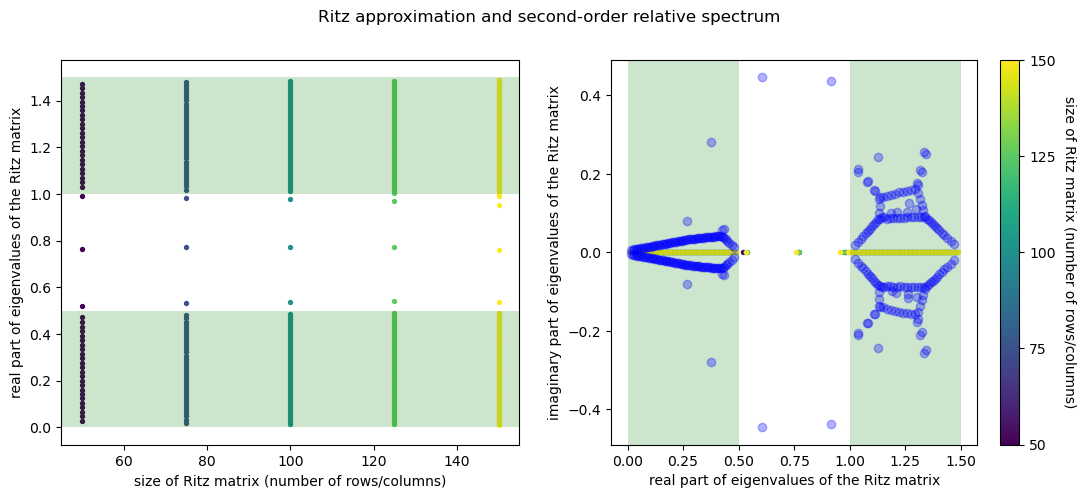

In [18]:
plot(spec_step_slope, sors=sors)

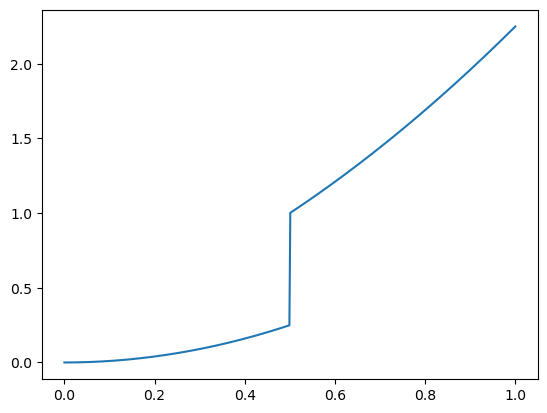

In [25]:
def step_slope_1(x):
    return x if x < 1/2 else x + 1/2

def step_slope_2(x):
    if x < 1/2:
        return x
    return x + 1/2

plt.plot(np.linspace(0, 1, 500), [step_slope_2(x)**2 for x in np.linspace(0, 1, 500)])